In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# Загрузка данных
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')


In [3]:
# Разделение данных на признаки и метки
X = dataset[:, 1:785]
Y = dataset[:, 0]

In [4]:
# Преобразование меток в категориальный формат
Y = to_categorical(Y, num_classes=26)

# Разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# Нормализация данных
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# Создание модели
model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# Обучение модели
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9687 - loss: 0.1223 - val_accuracy: 0.9808 - val_loss: 0.0820
Epoch 2/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9687 - loss: 0.1244 - val_accuracy: 0.9812 - val_loss: 0.0799
Epoch 3/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9703 - loss: 0.1194 - val_accuracy: 0.9804 - val_loss: 0.0813
Epoch 4/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9704 - loss: 0.1205 - val_accuracy: 0.9801 - val_loss: 0.0857
Epoch 5/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9700 - loss: 0.1222 - val_accuracy: 0.9807 - val_loss: 0.0863
Epoch 6/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9710 - loss: 0.1172 - val_accuracy: 0.9809 - val_loss: 0.0821
Epoch 7/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9723 - loss: 0.1144 - val_accuracy: 0.9818 - val_loss: 0.0824
Epoch 8/10
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9717 - loss: 0

In [33]:
# Оценка модели на тестовой выборке
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9815 - loss: 0.0856
Test accuracy: 0.9822797179222107


In [34]:
# Построение графиков точности и потерь
plt.figure(figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

Text(0.5, 1.0, 'Точность на обучающей и валидационной выборках')

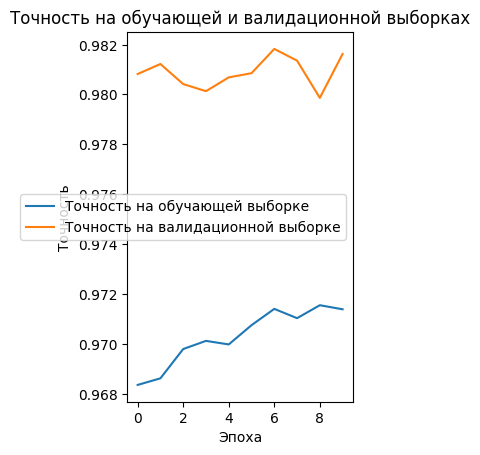

In [35]:
# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.title('Точность на обучающей и валидационной выборках')




Text(0.5, 1.0, 'Потери на обучающей и валидационной выборках')

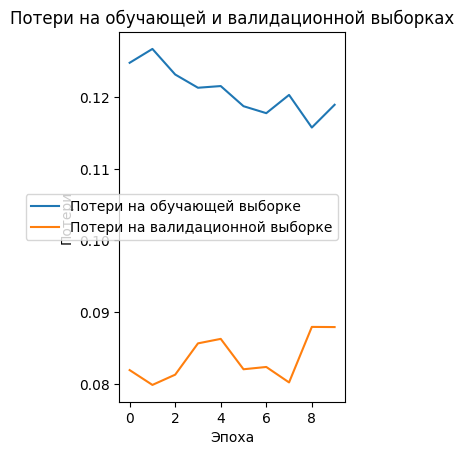

In [36]:
# График потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.title('Потери на обучающей и валидационной выборках')

# Потери на обучающей выборке:

Потери на обучающей выборке (синяя линия) быстро уменьшаются в первые несколько эпох, что указывает на то, что модель быстро обучается на обучающей выборке.
После первых нескольких эпох потери продолжают снижаться, но уже не так стремительно. Это свидетельствует о том, что модель продолжает улучшаться, но уже с меньшей скоростью.
# Потери на валидационной выборке:

Потери на валидационной выборке (оранжевая линия) также снижаются в первые несколько эпох, но не так стремительно, как на обучающей выборке.
После нескольких эпох потери на валидационной выборке начинают колебаться и даже немного увеличиваться. Это может указывать на начало переобучения модели, когда она начинает "запоминать" обучающую выборку, но хуже обобщает данные на валидационной выборке.
# Сравнение потерь:

В начале обучения потери на валидационной выборке ниже, чем на обучающей, что может быть связано с тем, что модель еще не успела "переобучиться" на обучающей выборке.
Со временем потери на валидационной выборке становятся выше, чем на обучающей, что указывает на переобучение.

# Выводы:
- Переобучение: График указывает на то, что модель начинает переобучаться после нескольких эпох. Это видно по увеличению потерь на валидационной выборке при продолжающемся снижении потерь на обучающей выборке.
- Оптимальное количество эпох: Для предотвращения переобучения можно попробовать остановить обучение раньше, например, после 5-10 эпох, когда потери на валидационной выборке еще не начали значительно увеличиваться.
- Регуляризация: Для улучшения обобщающей способности модели можно попробовать использовать методы регуляризации, такие как Dropout или L2-регуляризация.


In [23]:
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential([
    Flatten(input_shape=(784,)),
    Dense(512, activation='relu'),
    Dropout(0.3),  # Добавление Dropout для регуляризации
    Dense(256, activation='relu'),
    Dropout(0.3),  # Добавление Dropout для регуляризации
    Dense(128, activation='relu'),
    Dropout(0.3),  # Добавление Dropout для регуляризации
    Dense(26, activation='softmax')
])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Ранняя остановка
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Обучение модели с ранней остановкой
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8273 - loss: 0.6066 - val_accuracy: 0.9583 - val_loss: 0.1451
Epoch 2/50
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9390 - loss: 0.2157 - val_accuracy: 0.9670 - val_loss: 0.1201
Epoch 3/50
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9498 - loss: 0.1827 - val_accuracy: 0.9710 - val_loss: 0.1022
Epoch 4/50
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9550 - loss: 0.1655 - val_accuracy: 0.9728 - val_loss: 0.1026
Epoch 5/50
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9574 - loss: 0.1557 - val_accuracy: 0.9737 - val_loss: 0.0972
Epoch 6/50
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9603 - loss: 0.1463 - val_accuracy: 0.9744 - val_loss: 0.0950
Epoch 7/50
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9611 - loss: 0.1442 - val_accuracy: 0.9772 - val_loss: 0.0907
Epoch 8/50
7449/7449 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9626 - loss: 0

In [ ]:
# Оценка модели на тестовой выборке
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Точность на тестовой выборке: {test_acc}')

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9790 - loss: 0.0824
Точность на тестовой выборке: 0.9799707531929016


Text(0.5, 1.0, 'Потери на обучающей и валидационной выборках')

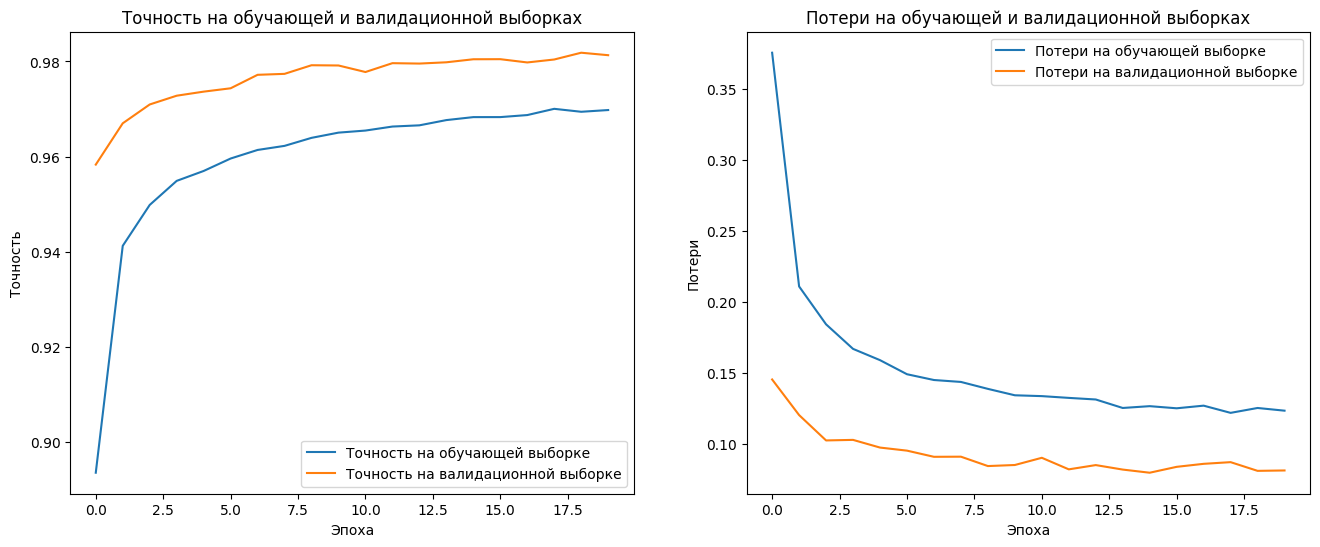

In [26]:


# Построение графиков точности и потерь
plt.figure(figsize=(16, 6))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.title('Точность на обучающей и валидационной выборках')

# График потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучающей выборке')
plt.plot(history.history['val_loss'], label='Потери на валидационной выборке')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.title('Потери на обучающей и валидационной выборках')